## Time Series Analysis Project Plan: Electricity Consumption

| Phase | English | Українська |
|-------|---------|------------|
| **1. Data Preparation**  | **Loading**: Import data from `electricity_consumption_and_production.csv`<br>**Cleaning**: Check for missing values, duplicates, anomalies<br>**Formatting**: Convert timestamps to datetime, ensure correct data types | **Завантаження**: Імпорт даних з `electricity_consumption_and_production.csv`<br>**Очищення**: Перевірка на пропуски, дублікати, аномалії<br>**Форматування**: Конвертація часових міток у datetime, переведення типів |
| **2. Exploratory Data Analysis (EDA)** | **Visualization**: Plot full time series<br>**Trend Analysis**: Detect long-term trend patterns<br>**Seasonality Analysis**: Detect daily/weekly/annual seasonality<br>**Statistical Analysis**: Descriptive statistics, correlations<br>**Target column**: Focus analysis strictly on `Consumption` | **Візуалізація**: Побудова графіка часового ряду<br>**Аналіз тренду**: Виявлення довгострокових змін<br>**Аналіз сезонності**: Дослідження добової/тижневої/річної сезонності<br>**Статистичний аналіз**: Описова статистика, кореляції<br>**Цільовий стовпець**: Аналізувати лише `Consumption` |
| **3. Modeling** | **SARIMAX**: Seasonal ARIMA model with exogenous variables (if any)<br>**Prophet**: Additive model with trend + seasonality<br>**Time-lagged Regression**: Use past lags of `Consumption` as features<br>**Chronos-Bolt**: Lecture-specific time series model (or equivalent, if unavailable) | **SARIMAX**: Сезонна авторегресійна інтегрована модель з можливими зовнішніми регресорами<br>**Prophet**: Адитивна модель з трендом і сезонністю<br>**Time-lagged Regression**: Регресія з лаговими ознаками `Consumption`<br>**Chronos-Bolt**: Модель з лекції або відповідний аналог |
| **4. Forecasting** | Predict `Consumption` for:<br>**15 days** → 360 hourly steps<br>**30 days** → 720 hourly steps<br>**45 days** → 1080 hourly steps<br>Each model should generate forecasts for all three horizons | Прогнозувати `Consumption` на:<br>**15 днів** → 360 погодинних кроків<br>**30 днів** → 720 погодинних кроків<br>**45 днів** → 1080 погодинних кроків<br>Кожна модель має здійснити прогноз на всі три горизонти |
| **5. Evaluation** | **Accuracy metrics**: MAE, RMSE, MAPE<br>**Performance**: Measure training and inference time for each model<br>**Visualization**: Plot actual vs forecasted data for each horizon<br>**Comparison**: Rank models by accuracy and speed for 15/30/45-day forecasts | **Метрики точності**: MAE, RMSE, MAPE<br>**Продуктивність**: Замір часу тренування та інференсу кожної моделі<br>**Візуалізація**: Побудова графіків реальних даних та прогнозів<br>**Порівняння**: Порівняння моделей за точністю та швидкістю для 15/30/45 днів |


---

### **Dataset Description: Electricity Consumption and Production**

| Feature | English Description | Український опис |
|---------|-------------------|------------------|
| DateTime | Timestamp of measurements | Часова мітка вимірювань |
| Consumption | Total electricity consumption | Загальне споживання електроенергії |
| Production | Total power production | Загальне виробництво електроенергії |
| Nuclear | Nuclear power generation | Виробництво атомної енергії |
| Wind | Wind power generation | Виробництво вітрової енергії |
| Hydroelectric | Hydroelectric power generation | Виробництво гідроелектроенергії |
| Oil and Gas | Power from oil and gas | Виробництво енергії з нафти та газу |
| Coal | Coal-based power generation | Виробництво енергії з вугілля |
| Solar | Solar power generation | Виробництво сонячної енергії |
| Biomass | Biomass power generation | Виробництво енергії з біомаси |

**Note:** All measurements are in Megawatts (MW) | **Примітка:** Всі вимірювання в мегаватах (МВт)

## Data loading and preprocessing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [4]:
df = pd.read_csv('/Users/vladislavpleshko/Documents/VS Code/before/amazinum/data/Electricity Consumption and Production.csv',
                 parse_dates=['DateTime'], index_col='DateTime')
df


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...
2025-03-19 19:00:00,8027,6177,1367,593,1922,1217,978,0,71
2025-03-19 20:00:00,7939,6228,1376,647,1920,1223,965,0,71
2025-03-19 21:00:00,7553,6120,1376,671,1881,1171,949,0,69


In [5]:
df.describe()


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,54161.000000,54161.000000,54161.000000,54161.000000,54161.000000,54161.000000,54161.000000,54161.000000,54161.000000
mean,6526.472517,6380.277820,1282.464467,771.755359,1792.715404,1166.810029,1138.518491,171.836266,54.938074
std,1048.276149,1015.434841,241.205651,666.568731,680.007685,433.943917,329.929889,257.269935,13.761892
min,2922.000000,3119.000000,562.000000,-26.000000,175.000000,195.000000,279.000000,0.000000,17.000000
25%,5710.000000,5639.000000,1341.000000,228.000000,1281.000000,860.000000,890.000000,0.000000,45.000000
50%,6474.000000,6322.000000,1378.000000,571.000000,1679.000000,1208.000000,1113.000000,3.000000,55.000000
75%,7268.000000,7058.000000,1400.000000,1167.000000,2191.000000,1510.000000,1358.000000,302.000000,65.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1552.000000,89.000000


In [6]:
print(df.dtypes)
print()
print(df.dtypes.value_counts())


Consumption      int64
Production       int64
Nuclear          int64
Wind             int64
Hydroelectric    int64
Oil and Gas      int64
Coal             int64
Solar            int64
Biomass          int64
dtype: object

int64    9
Name: count, dtype: int64


In [7]:
null_counts = df.isnull().sum()
for column, count in null_counts.items():
    print(f"{column}: {count} nulls")


Consumption: 0 nulls
Production: 0 nulls
Nuclear: 0 nulls
Wind: 0 nulls
Hydroelectric: 0 nulls
Oil and Gas: 0 nulls
Coal: 0 nulls
Solar: 0 nulls
Biomass: 0 nulls


In [8]:
duplicates = df.duplicated().sum()

# Перевірка наявності дублікатів у DateTime
print("\nBefore cleaning:")
print(f"Count rows: {len(df)}")
print(f"Count duplicated rows: {df.index.duplicated().sum()}")

# Видалення дублікатів, зберігаємо перший запис
df = df[~df.index.duplicated(keep='first')]

print("\nAfter cleaning:")
print(f"Count rows: {len(df)}")
print(f"Count duplicated rows: {df.index.duplicated().sum()}")



Before cleaning:
Count rows: 54161
Count duplicated rows: 10

After cleaning:
Count rows: 54151
Count duplicated rows: 0


## Exploratory Data Analysis

In [9]:
df_hourly = df['Consumption'].copy() # type: ignore


In [10]:
df_daily = df_hourly.resample('D').mean()
df_weekly = df_hourly.resample('W').mean()
df_monthly = df_hourly.resample('ME').mean()

df_daily = df_daily.dropna(how='all')
df_monthly = df_monthly.dropna(how='all')
df_weekly = df_weekly.dropna(how='all')


In [11]:
df_daily


DateTime
2019-01-01    5924.478261
2019-01-02    6322.041667
2019-01-03    7254.083333
2019-01-04    7635.083333
2019-01-05    7423.521739
                 ...     
2025-03-15    5817.956522
2025-03-16    5346.375000
2025-03-17    6603.125000
2025-03-18    6733.250000
2025-03-19    6512.772727
Name: Consumption, Length: 2268, dtype: float64

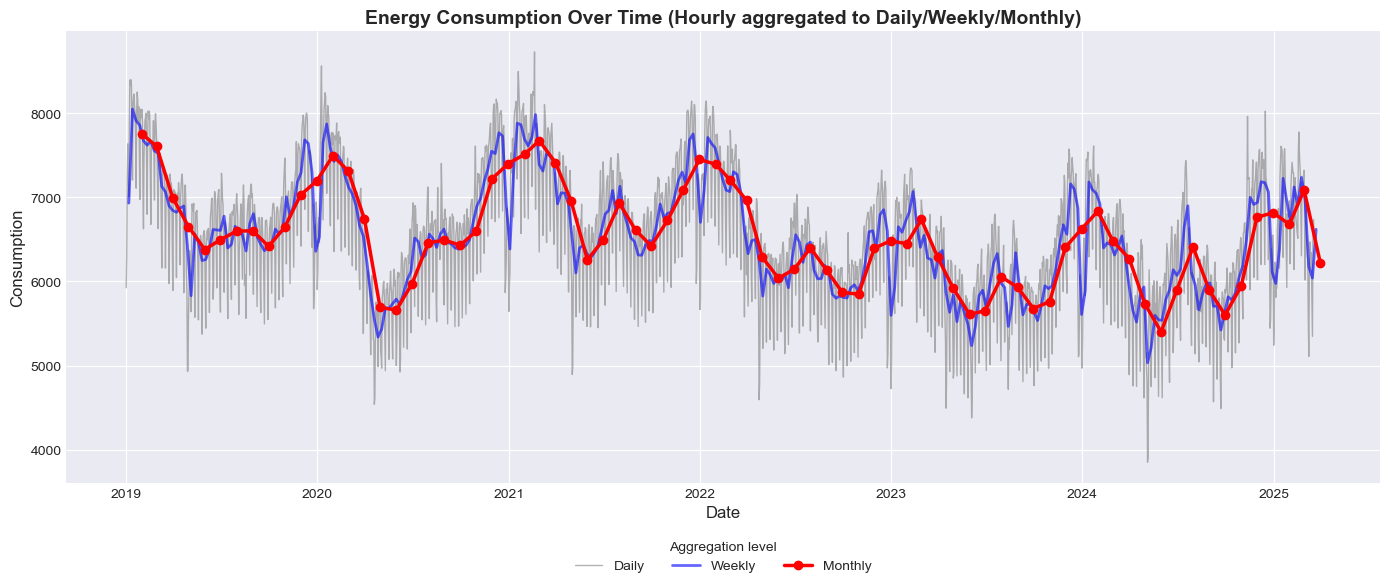

In [12]:
fig, ax = plt.subplots(figsize=(14,6))

# daily
ax.plot(df_daily.index,
        df_daily,
        alpha=0.6,
        linewidth=1,
        color='gray',
        label='Daily')
# weekly
ax.plot(df_weekly.index,
        df_weekly,
        alpha=0.6,
        linewidth=2,
        label='Weekly',
        color='blue')
# monthly
ax.plot(df_monthly.index,
        df_monthly,
        linewidth=2.5,
        marker='o',
        label='Monthly',
        color='red')
# general
ax.set_title('Energy Consumption Over Time (Hourly aggregated to Daily/Weekly/Monthly)',
             fontsize=14, fontweight='bold')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Consumption', fontsize=12)

ax.legend(title='Aggregation level', fontsize=10, bbox_to_anchor=(0.5, -0.10), loc='upper center', ncol=3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_decomposition = seasonal_decompose(df_daily, period=7)
weekly_decomposition = seasonal_decompose(df_weekly, period=7)
monthly_decomposition = seasonal_decompose(df_monthly, period=12)

def make_plot_decompostion(decomp, title):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,12), sharex=True)
    decomp.observed.plot(ax=ax1, title='Original range')
    decomp.trend.plot(ax=ax2, title='Trend')
    decomp.seasonal.plot(ax=ax3, title='Seasonality')
    decomp.resid.plot(ax=ax4, title='Residual (noise)')

    plt.suptitle(f'Time Series Decomposition: {title}',
                 fontsize=16,
                 y=0.99,
                 fontweight='bold',
                 fontfamily='sans-serif',
                 color='darkblue')
    plt.tight_layout()
    plt.show()


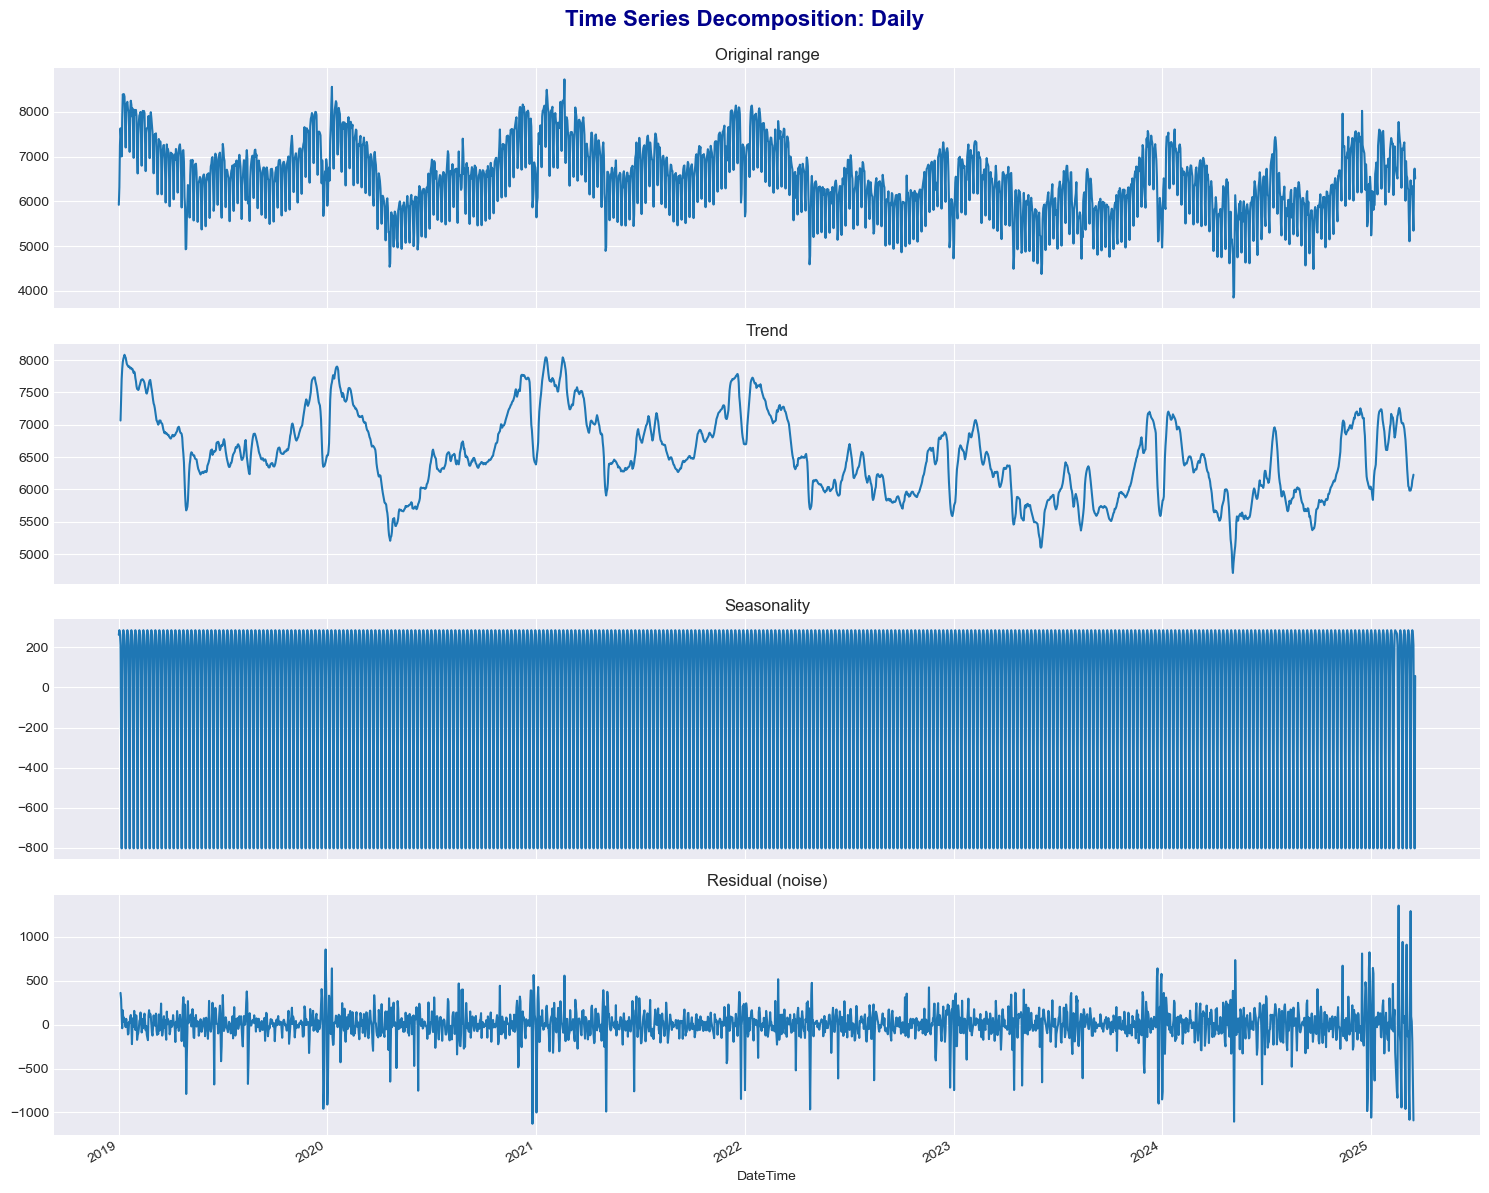

In [14]:
make_plot_decompostion(decomp=daily_decomposition, title='Daily')


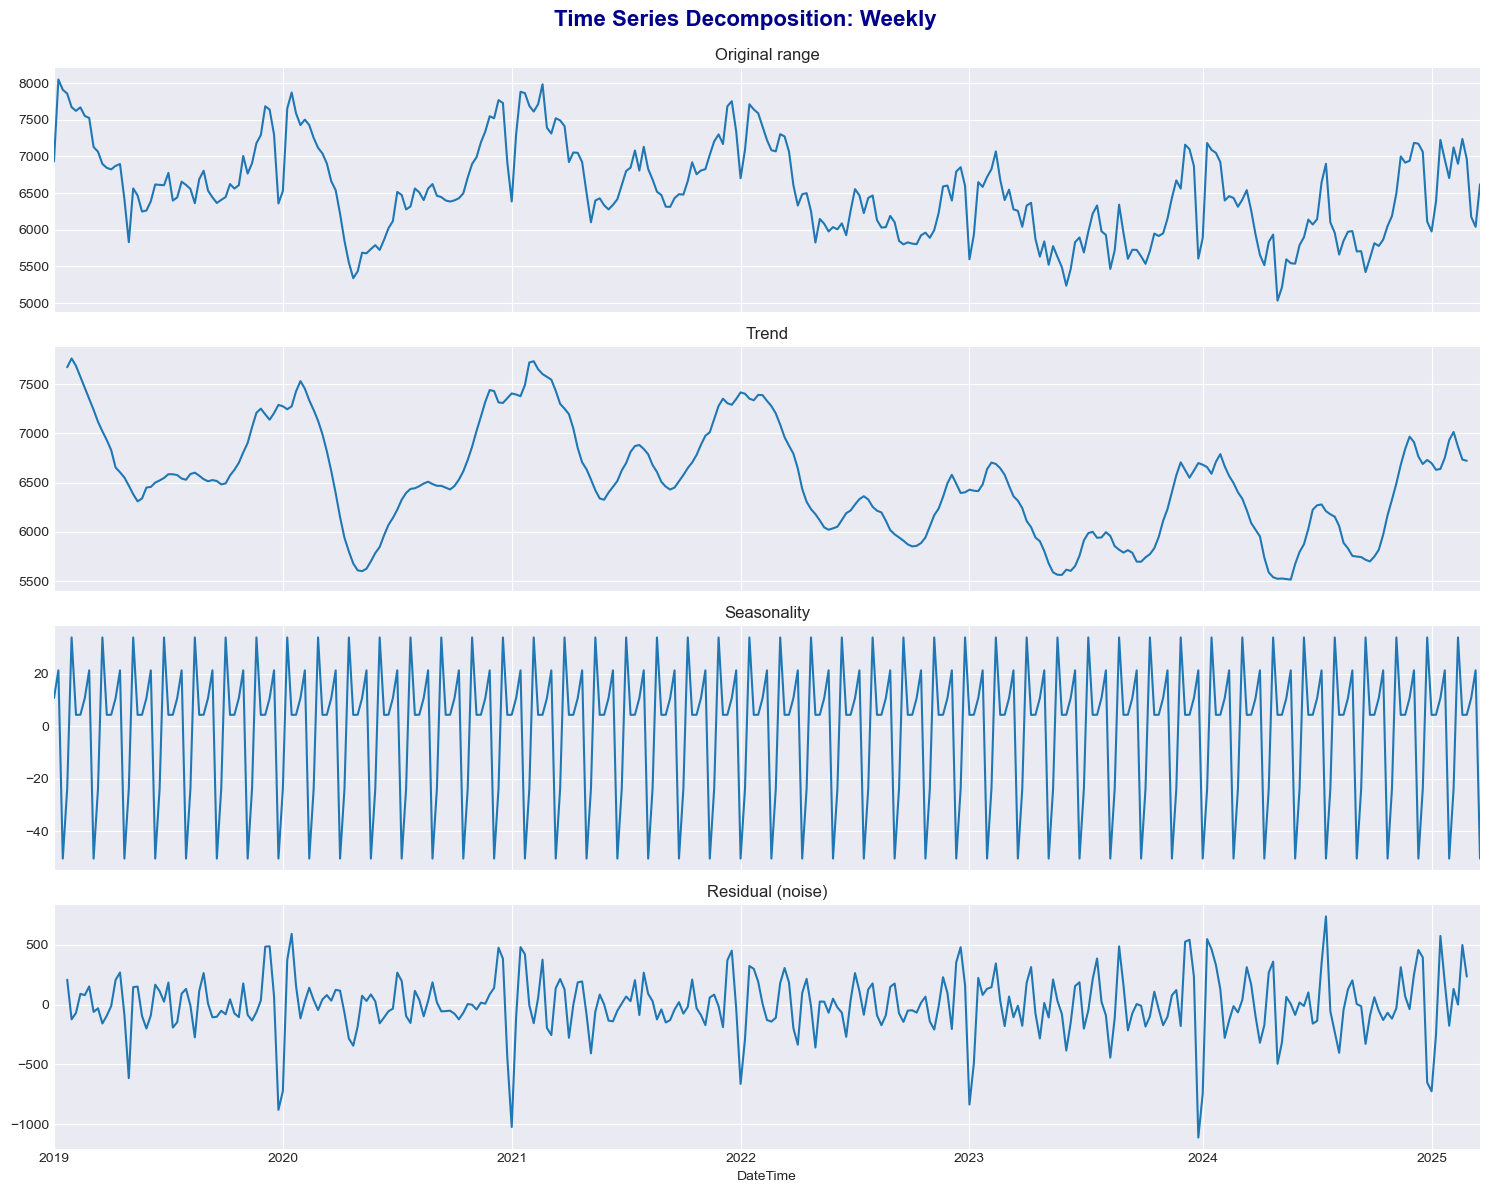

In [15]:
make_plot_decompostion(decomp=weekly_decomposition, title='Weekly')


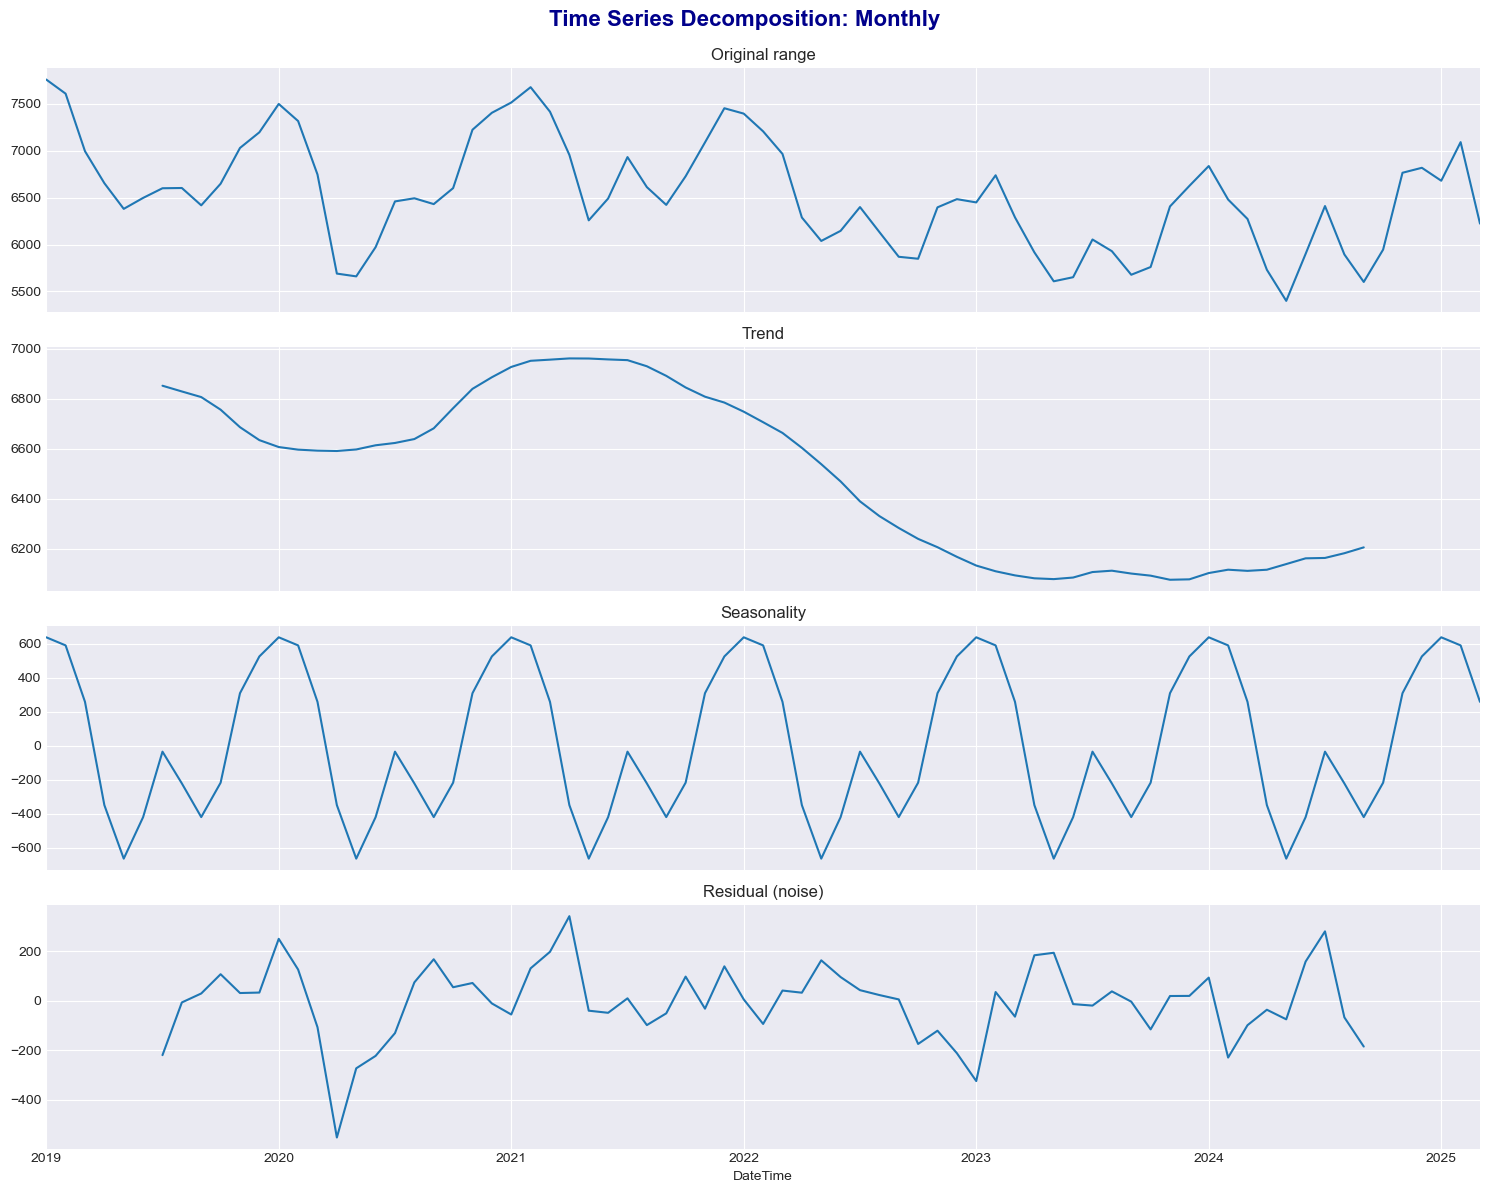

In [16]:
make_plot_decompostion(decomp=monthly_decomposition, title='Monthly')


| Питання                                       |  Відповідь           |
| --------------------------------------------- | ----------------------------- |
| Чи є сезонність?                              | `Seasonality` subplot         |
| Який тренд у споживанні?                      | `Trend` subplot               |
| Чи добре модель пояснює ряд?                  | `Residual` (якщо шум — добре) |
| Чи правильна сезонність (`period`)?           | `Seasonality`, `Residual`     |
| Чи є викиди, аномалії або структурні залишки? | `Residual`, `Observed`        |


## Modelling

### Stationarity 

Стаціонарні дані (часовий ряд) — це ті, у яких протягом усього спостережуваного періоду:

- Середнє (mean) залишається приблизно постійним.
- Дисперсія (variance) не змінюється з часом.
- Автоковаріація залежить лише від лагу між спостереженнями, а не від абсолютного часу.

Відповідно, у стаціонарних даних немає вираженого тренду чи сезонності.

*(документую інформацію для себе, так як точно знаю що буду повертатись, щоб освіжити та згадати знання у подальшій практиці)*

In [17]:
from statsmodels.tsa.stattools import adfuller

def adf_stationarity_test(time_series: pd.Series):
    """Checks if time series is stationary based on ADF test"""

    adf_result = adfuller(time_series)
    p_value = adf_result[1]
    print(f"p_value: {p_value}")

    if p_value < 0.05:
        print('True: Reject the null hypothesis: The time series is stationary')
    else:
        print('False: Fail to reject the null hypothesis: The time series is non-stationary')

is_stationarity_daily = adf_stationarity_test(df_daily)


p_value: 0.009895690147044589
True: Reject the null hypothesis: The time series is stationary


In [18]:
daily_stat = adf_stationarity_test(df_daily)
weekly_stat = adf_stationarity_test(df_weekly)
monthly_stat = adf_stationarity_test(df_monthly)


p_value: 0.009895690147044589
True: Reject the null hypothesis: The time series is stationary
p_value: 0.0029807010196067317
True: Reject the null hypothesis: The time series is stationary
p_value: 0.7521575409112645
False: Fail to reject the null hypothesis: The time series is non-stationary


In [19]:
df_monthly_stat = df_monthly.diff().dropna()
print(adf_stationarity_test(df_monthly_stat))


p_value: 0.4393369408221824
False: Fail to reject the null hypothesis: The time series is non-stationary
None


## **Build a Predicitve Model**

### **SARIMA**
#### **Ключові етапи SARIMA-прогнозування**

1. **Підготовка даних**
   - Завантаження та очищення даних.

2. **Аналіз ряду**
   - Візуалізація, перевірка стаціонарності.

3. **Підбір параметрів**
   - Автоматичний тюнінг SARIMA (Tuner).

4. **Навчання моделі**
   - Побудова SARIMAX з найкращими параметрами.

5. **Прогнозування та оцінка**
   - Прогноз на test,

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [21]:
def calculate_metrics(test_series: pd.Series, forecast_series: pd.Series):
    """
    Calculate metrics for the forecasted values

    Args:
        test_series (pd.Series): Time Series for evaluation
        forecasted_series (pd.Series): Forecasted values

    Returns:
        - mape: Mean Absolute Percentage Error between test vs forecast
        - mae: Mean Absolute Error between test vs forecast
        - mse: Mean Squared Error between test vs forecast
    """

    mape = mean_absolute_percentage_error(test_series, forecast_series)
    mae = mean_absolute_error(test_series, forecast_series)
    mse = mean_squared_error(test_series, forecast_series)

    return mape, mae, mse


def visualize_forecast(
    train_series: pd.Series,
    test_series: pd.Series,
    forecast_series: pd.Series,
    title: str="Forecasting predictions"
):
    """
    Visualize forecasting predictions with metrics

    Args:
        train_series (pd.Series): Historircal time series
        test_series (pd.Series): Time Series for evaluation
        forecasted_series (pd.Series): Forecasted values
        title (str): Plot title
    """

    # Calculate metrics
    mape, mae, mse = calculate_metrics(test_series, forecast_series)

    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 6))

    # Plot each series
    train_series.plot(ax=ax, label="Train series")
    test_series.plot(ax=ax, label="Test Series")
    forecast_series.plot(ax=ax, label="Predicted Series")

    # Plotting titles and labels
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Forecast results")
    ax.grid(True)
    ax.legend(title="Series")

    # Add the metrics as text on the plot
    metrics_text = f"MAPE: {mape:.2f}%\nMAE: {mae:.2f}\nMSE: {mse:.2f}"
    ax.text(0.99, 0.95, metrics_text, transform=ax.transAxes,
            fontsize=12, verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=1'))

    plt.tight_layout()
    plt.show()


In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from mango import scheduler, Tuner


In [21]:
@scheduler.parallel(n_jobs=-1)
def sarima_objective(**params):
    """Objective function to find best set of SARIMAX parameters"""

    p, d, q, P, D, Q, s = int(params['p']), int(params['d']), int(params['q']), \
                        int(params['P']), int(params['D']), int(params['Q']), int(params['s'])

    try:
        model = SARIMAX(train_series,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        aic = results.aic # Minimize AIC to find the best model
    except:
        aic = np.inf

    return aic


In [ ]:
sarimax_param_space = {
    'p': range(0, 3),   # порядок авторегресії (AR) — скільки попередніх значень враховувати
    'd': [1],           # порядок диференціювання (I) — скільки разів брати різницю для стаціонарності
    'q': range(0, 3),   # порядок ковзної середньої (MA) — скільки попередніх помилок враховувати
    'P': range(0, 3),   # сезонний порядок авторегресії (SAR) — скільки сезонних лагів враховувати
    'D': [1],           # сезонне диференціювання (SI) — скільки разів брати сезонну різницю
    'Q': range(0, 3),   # сезонний порядок ковзної середньої (SMA) — скільки сезонних помилок враховувати
    's': [365]          # довжина сезонного циклу
}


In [ ]:
tuner = Tuner(
	sarimax_param_space,
	objective=sarima_objective,
	conf_dict={"num_iteration": 10}
)
tuning_results = tuner.minimize()
best_params = tuning_results["best_params"]
best_params


In [ ]:
tuner = Tuner(sarimax_param_space, objective=sarima_objective, conf_dict={"num_iteration": 10})
tuning_results = tuner.minimize()
best_params = tuning_results["best_params"]
best_params


In [ ]:
# order = (
#     best_params["p"],
#     best_params["d"],
#     best_params["q"],
# )

# seasonal_order = (
#     best_params["P"],
#     best_params["D"],
#     best_params["Q"],
#     best_params["s"],
# )


In [ ]:
''''ініціалізація на готових параметрах'''
order = (1, 1, 2)
seasonal_order = (1, 1, 2, 356)
test_size = [15,30,45]
for period in test_size:
    print(f'Forecasting for {period}')
    train_series = df_daily.iloc[:-period]
    test_series = df_daily.iloc[-period:]

    model = SARIMAX(train_series, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)

    forecast_series = results.forecast(steps=len(test_series))
    forecast_series.index = test_series.index

    visualize_forecast(
        train_series[-100:],
        test_series,
        forecast_series,
        title=(f'SARIMA prediction ({period} days)')
    )


### **PROPHET**

In [23]:
from prophet import Prophet


11:35:13 - cmdstanpy - INFO - Chain [1] start processing


Прогноз на 15 днів:


11:35:14 - cmdstanpy - INFO - Chain [1] done processing


Модель: Prophet | Час прогнозування: 0.963 секунд


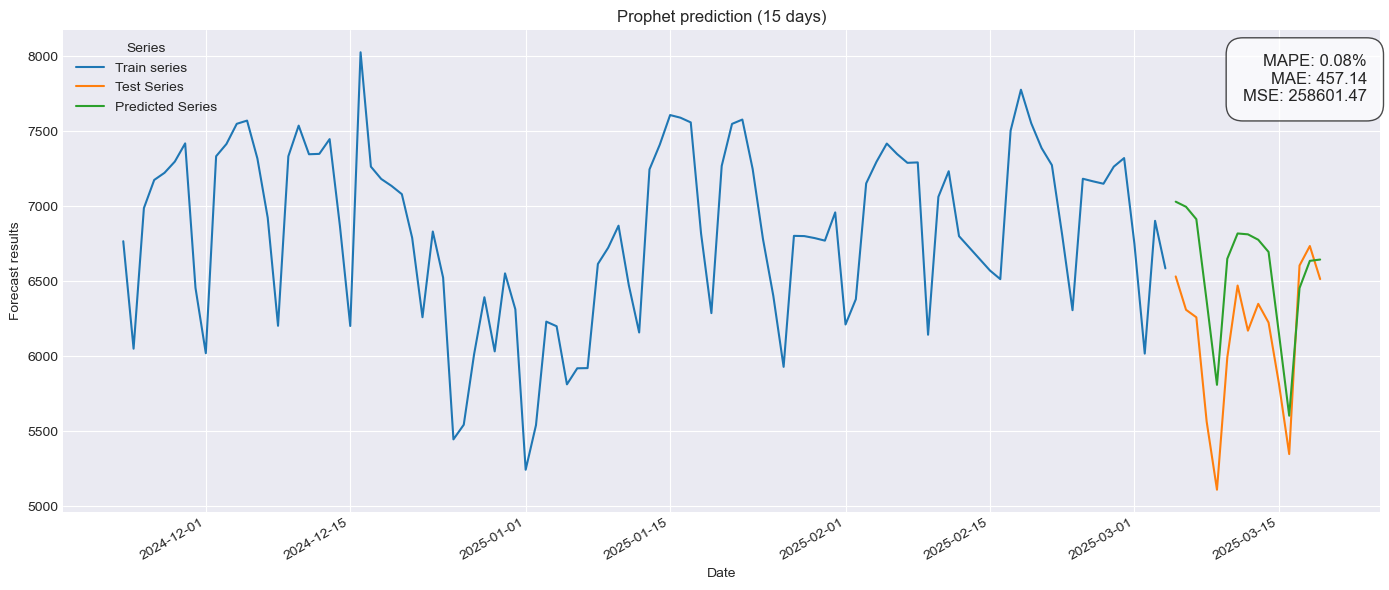

11:35:15 - cmdstanpy - INFO - Chain [1] start processing


Прогноз на 30 днів:


11:35:15 - cmdstanpy - INFO - Chain [1] done processing


Модель: Prophet | Час прогнозування: 0.836 секунд


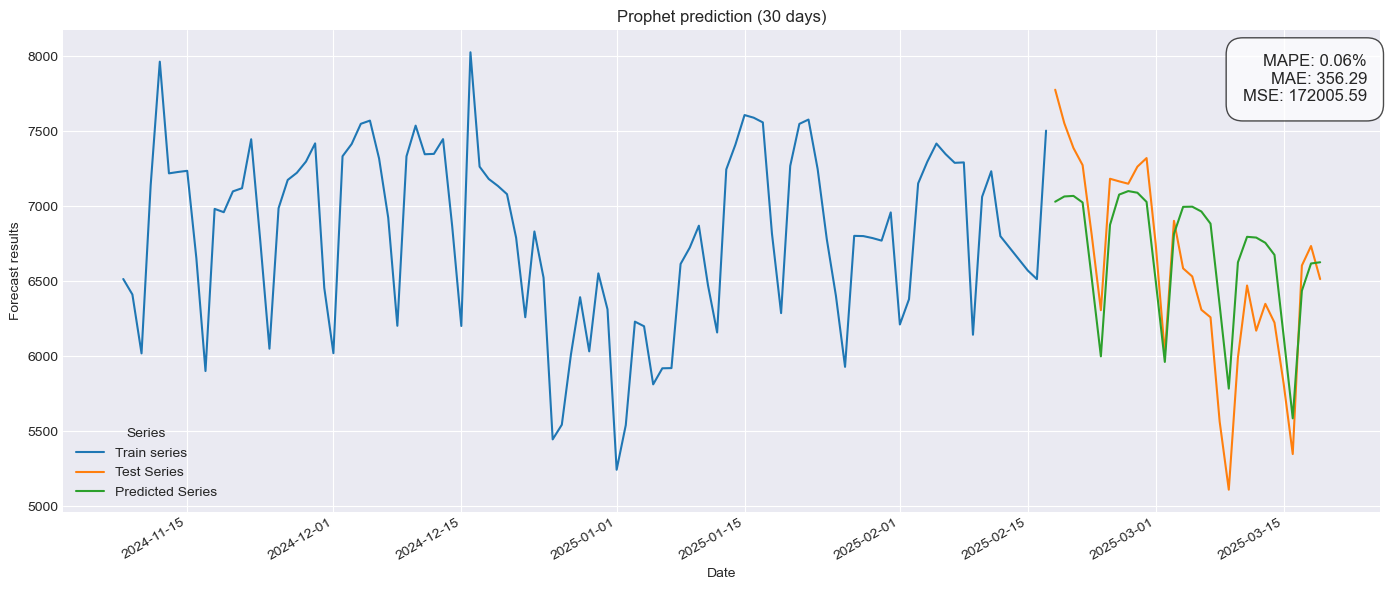

11:35:16 - cmdstanpy - INFO - Chain [1] start processing


Прогноз на 45 днів:


11:35:16 - cmdstanpy - INFO - Chain [1] done processing


Модель: Prophet | Час прогнозування: 0.651 секунд


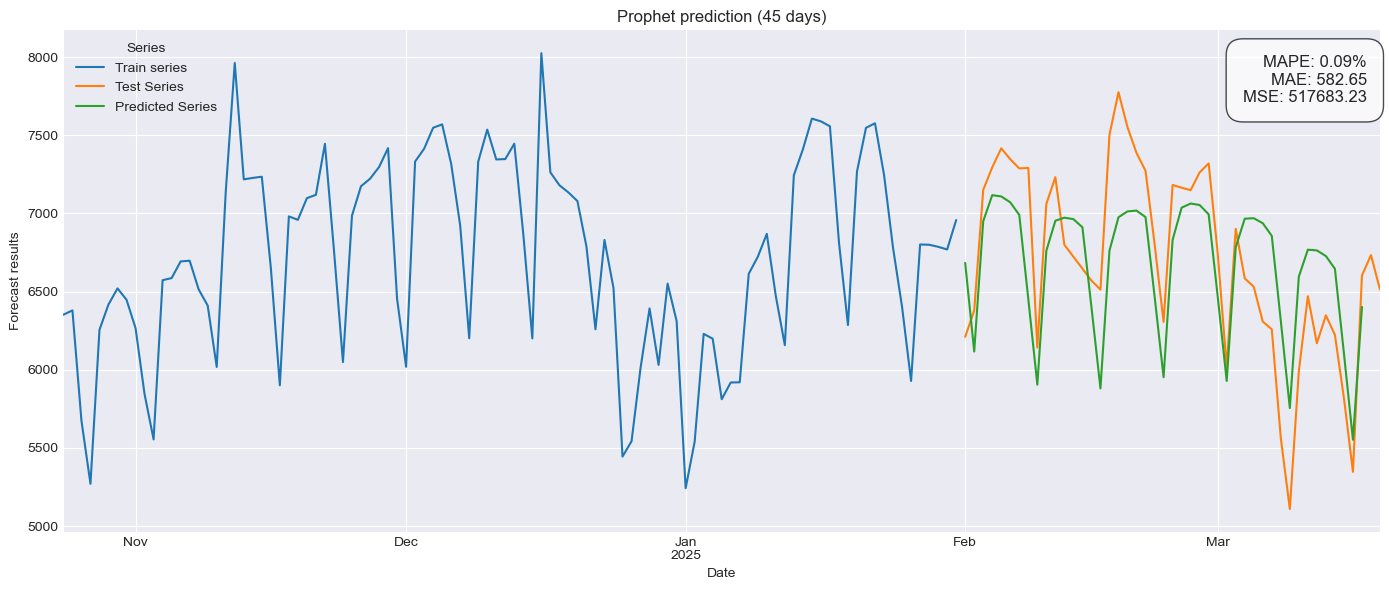


Зведена інформація по перфомансу:
     model   k      MAPE         MAE            MSE  Time (s)
0  Prophet  15  0.076292  457.144902  258601.466369  0.963251
1  Prophet  30  0.055789  356.287884  172005.589789  0.836386
2  Prophet  45  0.089858  582.653601  517683.230262  0.651202


In [31]:
import time

def prophet_forecast_plot(df_daily, k, model_name = str('Prophet')):
    start_time = time.time()
    train_series = df_daily.iloc[:-k]
    test_series = df_daily.iloc[-k:]

    train_df_prophet = pd.DataFrame({
        'ds': train_series.index,
        'y': train_series.values
    })

    model = Prophet()
    model.fit(train_df_prophet)

    future_df = model.make_future_dataframe(periods=len(test_series), include_history=False, freq='D')
    forecast = model.predict(future_df)
    elapsed = time.time() - start_time
    print(f"Модель: {model_name} | Час прогнозування: {elapsed:.3f} секунд")
    forecast_series = forecast.set_index('ds')['yhat']

    visualize_forecast(
        train_series[-100:],
        test_series,
        forecast_series,
        title=(f'Prophet prediction ({k} days)')
    )

    # Повертаємо метрики
    mape, mae, mse = calculate_metrics(test_series, forecast_series)
    return {"model": model_name ,"k": k, "MAPE": mape, "MAE": mae, "MSE": mse, "Time (s)": elapsed}

# Цикл прогнозування з метриками
results = []
for k in [15, 30, 45]:
    print(f"Прогноз на {k} днів:")
    res = prophet_forecast_plot(df_daily, k)
    results.append(res)

# Вивід зведеної інформації
results_df = pd.DataFrame(results)
print("\nЗведена інформація по перфомансу:")
print(results_df)


In [ ]:
results_df


,model,k,MAPE,MAE,MSE,Time (s)
0,Prophet,15,0.076292,457.144902,258601.466369,0.963251
1,Prophet,30,0.055789,356.287884,172005.589789,0.836386
2,Prophet,45,0.089858,582.653601,517683.230262,0.651202


### **TIME-LAGGED MODEL**

In [33]:
from xgboost import XGBRegressor


Прогноз на 15 днів:
Модель: XGBRegressor | Час прогнозування: 0.587 секунд


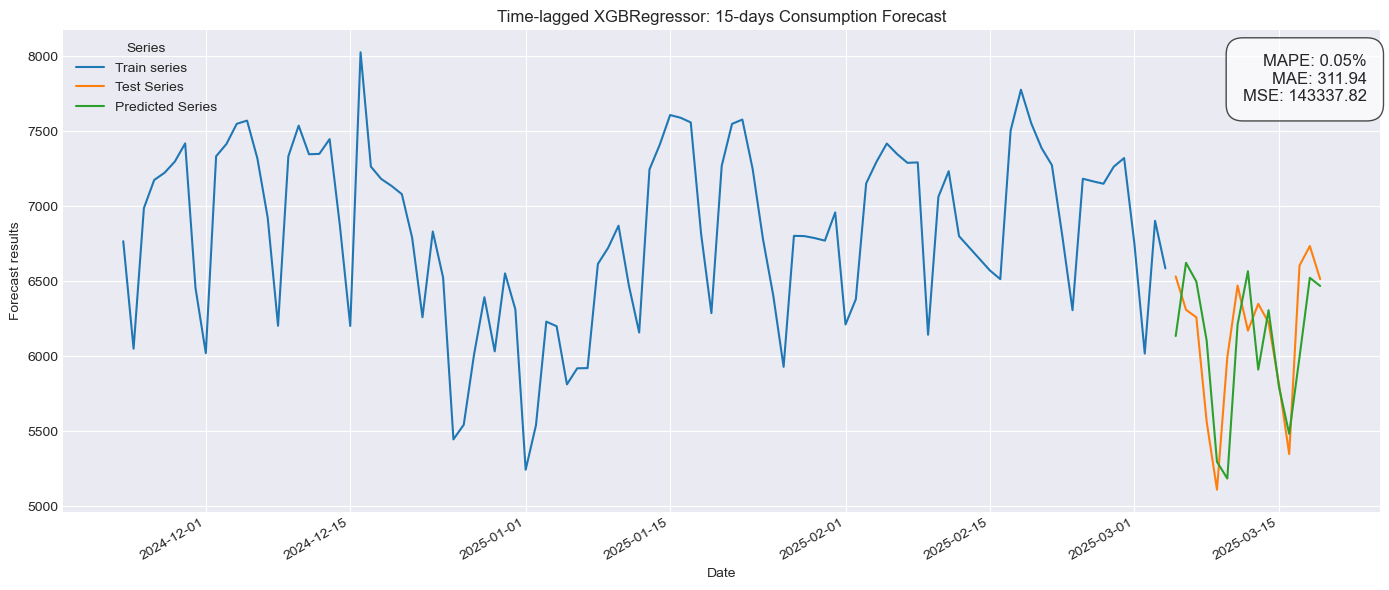

Прогноз на 30 днів:
Модель: XGBRegressor | Час прогнозування: 0.796 секунд


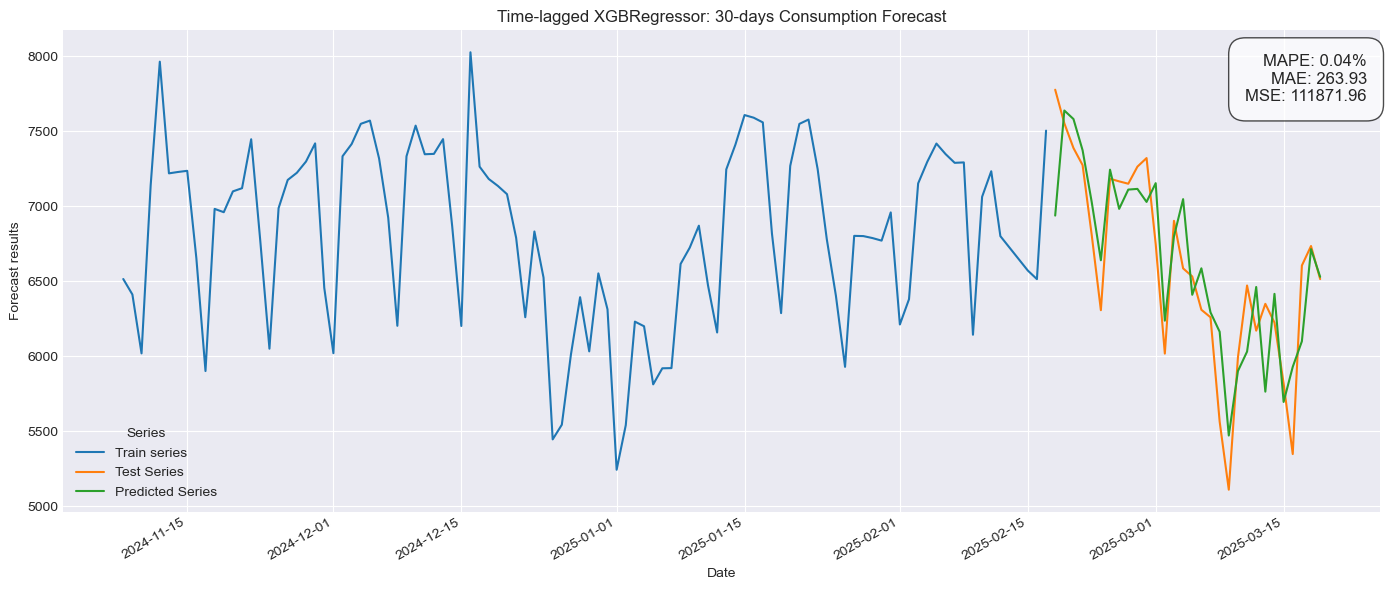

Прогноз на 45 днів:
Модель: XGBRegressor | Час прогнозування: 0.648 секунд


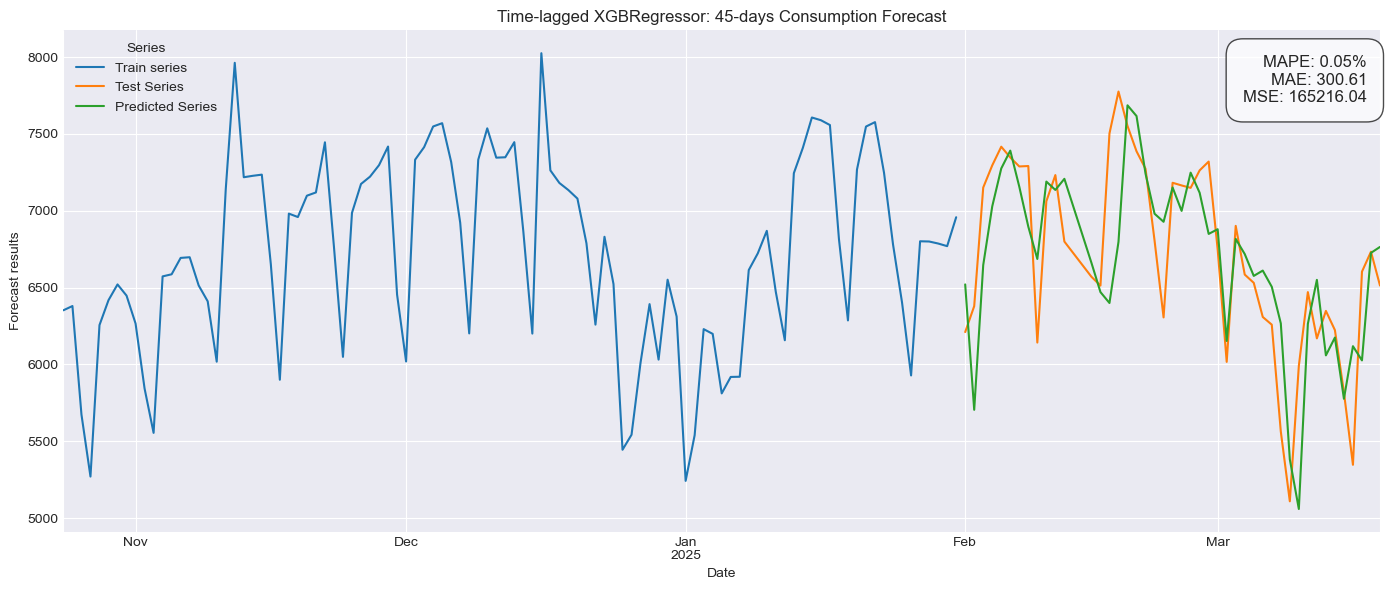


Зведена інформація по перфомансу:
          model   k      MAPE         MAE            MSE  Time (s)
0  XGBRegressor  15  0.050843  311.936635  143337.823972  0.587337
1  XGBRegressor  30  0.041226  263.931086  111871.962453  0.796377
2  XGBRegressor  45  0.045926  300.608199  165216.037517  0.648140


In [38]:
def time_lagged_xgb_forecast(
    time_series: pd.Series,
    lags: int = 12,
    model_cls=XGBRegressor,
):

    def create_lag_features(ts, lags):
        df = pd.DataFrame(ts)
        for i in range(1, lags + 1):
            df[f'lag_{i}'] = df.iloc[:, 0].shift(i)
        return df

    lagged_df = create_lag_features(time_series, lags).dropna()
    X = lagged_df.drop(columns=[time_series.name])
    y = lagged_df[time_series.name]

    X_train, X_test = X.iloc[:-k], X.iloc[-k:]
    y_train, y_test = y.iloc[:-k], y.iloc[-k:]

    # Прогноз
    start_time = time.time()
    model = model_cls()
    model.fit(X_train, y_train)

    # Обробка результату
    y_pred = model.predict(X_test)
    elapsed = time.time() - start_time
    print(f"Модель: {model_cls.__name__} | Час прогнозування: {elapsed:.3f} секунд")
    y_pred_series = pd.Series(y_pred, index=y_test.index)

    # Візуалізація
    visualize_forecast(
        train_series=y_train[-100:],
        test_series=y_test,
        forecast_series=y_pred_series,
        title=f'Time-lagged XGBRegressor: {k}-days Consumption Forecast'
    )

    mape, mae, mse = calculate_metrics(y_test, y_pred_series)
    return {"model": model_cls.__name__, "k": k, "MAPE": mape, "MAE": mae, "MSE": mse, "Time (s)": elapsed}

results1 = []
for k in [15, 30, 45]:
    print(f"Прогноз на {k} днів:")
    res = time_lagged_xgb_forecast(df_daily, k)
    results1.append(res)

# Вивід зведеної інформації
results_df1 = pd.DataFrame(results1)
print("\nЗведена інформація по перфомансу:")
print(results_df1)


### **CHRONOS-BOLT**


**Для Chronos-Bolt процес виглядає так:**
1. Ви створюєте модель через from_pretrained (модель вже навчена на великому датасеті, тобто "pretrained").
2. Для вашого завдання ви не тренуєте її додатково (fine-tuning не використовується у цьому прикладі).
3. Ви передаєте історичний ряд (train_series.values) у вигляді torch.tensor як context.
4. Викликаєте .predict_quantiles(...), де prediction_length — це довжина прогнозу (наприклад, 45 днів).
5. На виході отримуєте прогноз (mean, quantiles тощо).

**!Прогнозування Chronos Bolt Base - у іншому блокноті!**

In [ ]:
chronos_res = pd.DataFrame({
    "model": ['amazon/chronos-bolt-base', 'amazon/chronos-bolt-base', 'amazon/chronos-bolt-base'],
    'k': [15,30,45],
    "MAPE": [0.152283, 0.107535, 0.092988],
    "MAE": [888.965204, 670.892412, 615.615736],
    "MSE": [1.077160e+06, 6.653808e+05, 5.683937e+05],
    "Time (s)": [5.500598, 5.487056, 5.492860]
})


In [ ]:
rests = pd.concat([results_df, results_df1, chronos_res], axis=0, ignore_index=True)
rests['MAPE'] = rests['MAPE']*100
rests


,model,k,MAPE,MAE,MSE,Time (s)
0,Prophet,15,7.629161,457.144902,2.586015e+05,0.963251
1,Prophet,30,5.578888,356.287884,1.720056e+05,0.836386
2,Prophet,45,8.985801,582.653601,5.176832e+05,0.651202
3,XGBRegressor,15,5.084310,311.936635,1.433378e+05,0.587337
4,XGBRegressor,30,4.122611,263.931086,1.118720e+05,0.796377
5,XGBRegressor,45,4.592639,300.608199,1.652160e+05,0.648140
6,amazon/chronos-bolt-base,15,15.228300,888.965204,1.077160e+06,5.500598
7,amazon/chronos-bolt-base,30,10.753500,670.892412,6.653808e+05,5.487056
8,amazon/chronos-bolt-base,45,9.298800,615.615736,5.683937e+05,5.492860


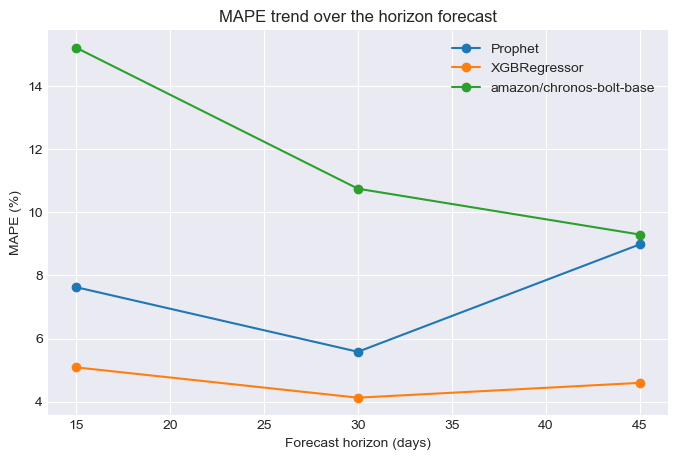

In [58]:
plt.figure(figsize=(8, 5))
for model, group in rests.groupby("model"):
    plt.plot(group["k"], group["MAPE"], marker='o', label=model)

plt.xlabel("Forecast horizon (days)")
plt.ylabel("MAPE (%)")
plt.title("MAPE trend over the horizon forecast")
plt.legend()
plt.grid(True)
plt.show()


- **SARIMA** виявилася непридатною для цих даних: при 5‑річному щоденному ряді з річною сезонністю тренування не завершилося за 220 хв. Ця модель занадто ресурсомістка для завдань із високою роздільною здатністю та довгими історичними серіями.

- **Prophet** показує помірну точність і швидкість. На 30‑денному горизонті MAPE ≈ 5.6 % з часом прогнозування < 1 с. Проте на довших горизонтах (45 днів) точність значно падає (MAPE ≈ 9 %), тому рекомендовано використовувати його для прогнозів до 30 днів.

- **XGBRegressor** забезпечує найкраще співвідношення точності та швидкодії: на 30 днів MAPE ≈ 4.1 %. Навіть на 45‑денному горизонті модель утримує MAPE < 5 %. Це робить XGBRegressor оптимальним вибором для більшості бізнес‑задач із прогнозування.

- **Chronos Bolt Base** виявилася найменш ефективною: час прогнозування ≈ 5.5 с і MAPE від 9.3 % до 15.2 % залежно від горизонту. Висока обчислювальна складність та відносно низька точність ускладнюють її використання в продакшені.

## Висновок:
Для практичного застосування та продакшн‑розгортання найбільш доцільно обирати XGBRegressor завдяки його стабільній точності та швидкодії, Prophet може доповнювати його для простих задач на горизонті до 30 днів, тоді як SARIMA і Chronos Bolt Base слід відкласти через їхні значні обчислювальні витрати та нижчу ефективність.

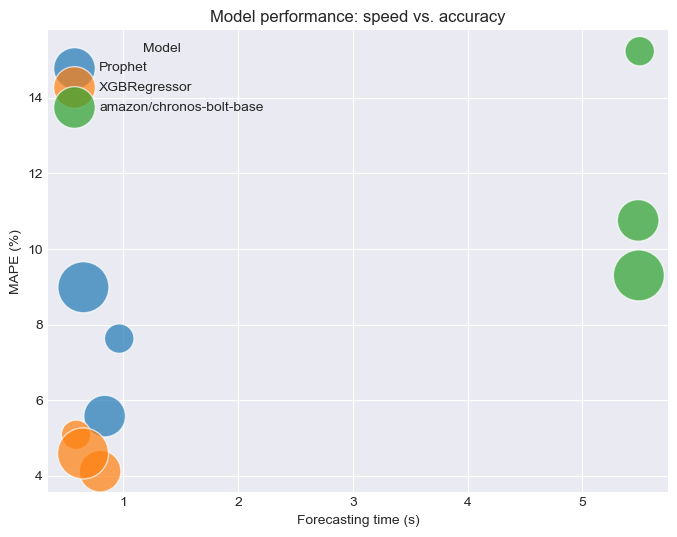

In [65]:
plt.figure(figsize=(8,6))
for model, grp in rests.groupby("model"):
    plt.scatter(
        grp["Time (s)"],
        grp["MAPE"],
        s=grp["k"]*30,
        label=model,
        alpha=0.7,
        edgecolors="w"
    )

plt.xlabel("Forecasting time (s)")
plt.ylabel("MAPE (%)")
plt.title("Model performance: speed vs. accuracy")
plt.legend(title="Model")
plt.grid(True)
plt.show()
